## UTKFace Experiments (Black-Box PIA)
### Load UTKFace dataset

In [15]:
import matplotlib.pyplot as plt

def plot_history(history, dist=None):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model accuracy ({"" if dist == None else dist*100}% old)')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.tight_layout()

In [1]:
from utk_functions import data_train_test_utk, fit_mobilenet, get_distributed_utk_sets

X_train, X_test, y_train, y_test, sensitive, sensitive_t = data_train_test_utk()

2024-02-05 16:37:52.679162: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-05 16:37:52.739959: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 16:37:52.740003: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 16:37:52.740038: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-05 16:37:52.750869: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-05 16:37:52.752069: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
from utk_functions import get_efficientnet_model

model = get_efficientnet_model()

16705208/16705208 [==============================] - 1s 0us/step


In [12]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=5,
    validation_data=(X_test, y_test)
)

Epoch 1/5
371/371 [==============================] - 29s 71ms/step - loss: 0.4241 - accuracy: 0.8286 - val_loss: 0.3082 - val_accuracy: 0.8643
Epoch 2/5
371/371 [==============================] - 25s 66ms/step - loss: 0.2704 - accuracy: 0.8817 - val_loss: 0.2739 - val_accuracy: 0.8752
Epoch 3/5
371/371 [==============================] - 24s 65ms/step - loss: 0.2338 - accuracy: 0.8996 - val_loss: 0.2479 - val_accuracy: 0.8927
Epoch 4/5
371/371 [==============================] - 24s 65ms/step - loss: 0.2162 - accuracy: 0.9093 - val_loss: 0.2518 - val_accuracy: 0.8913
Epoch 5/5
371/371 [==============================] - 24s 65ms/step - loss: 0.1918 - accuracy: 0.9228 - val_loss: 0.2615 - val_accuracy: 0.8844


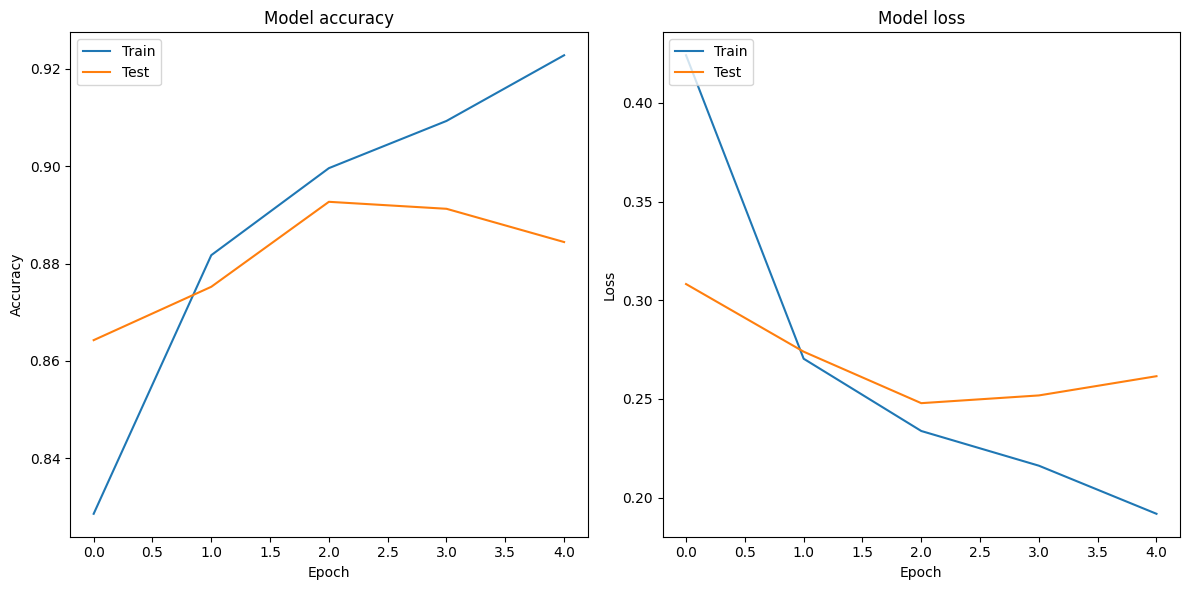

In [13]:
plot_history(history)

In [15]:
# ohne flip layer
def get_model():
    groups = 32
    return tf.keras.Sequential([
        #tf.keras.layers.RandomFlip(
        #    "horizontal",
        #    seed=42,
        #    input_shape=(64, 64, 3),
        #),
        tf.keras.layers.Conv2D(
            filters=32,
            kernel_size=(3, 3),
            strides=1,
            padding="same",
            activation="relu",
            input_shape=(64, 64, 3),
        ),
        tf.keras.layers.GroupNormalization(groups=groups),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(
            filters=32,
            kernel_size=(3, 3),
            strides=1,
            padding="same",
            activation="relu",
        ),
        tf.keras.layers.GroupNormalization(groups=groups),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(
            filters=64,
            kernel_size=(3, 3),
            strides=1,
            padding="same",
            activation="relu",
        ),
        tf.keras.layers.GroupNormalization(groups=groups),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.GroupNormalization(groups=groups),
        tf.keras.layers.Dense(2, activation="softmax"),
    ])

In [16]:
model = get_model()
model.compile(
    optimizer=Adam(),#W(learning_rate=0.0001, weight_decay=0.0001),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=5,
    validation_data=(X_test, y_test)
)

Epoch 1/5
371/371 [==============================] - 28s 70ms/step - loss: 0.3900 - accuracy: 0.8343 - val_loss: 0.2778 - val_accuracy: 0.8776
Epoch 2/5
371/371 [==============================] - 24s 64ms/step - loss: 0.2500 - accuracy: 0.8938 - val_loss: 0.2588 - val_accuracy: 0.8860
Epoch 3/5
371/371 [==============================] - 24s 64ms/step - loss: 0.2030 - accuracy: 0.9166 - val_loss: 0.2709 - val_accuracy: 0.8858
Epoch 4/5
371/371 [==============================] - 24s 64ms/step - loss: 0.1780 - accuracy: 0.9288 - val_loss: 0.2388 - val_accuracy: 0.8973
Epoch 5/5
371/371 [==============================] - 24s 64ms/step - loss: 0.1394 - accuracy: 0.9482 - val_loss: 0.2632 - val_accuracy: 0.8981


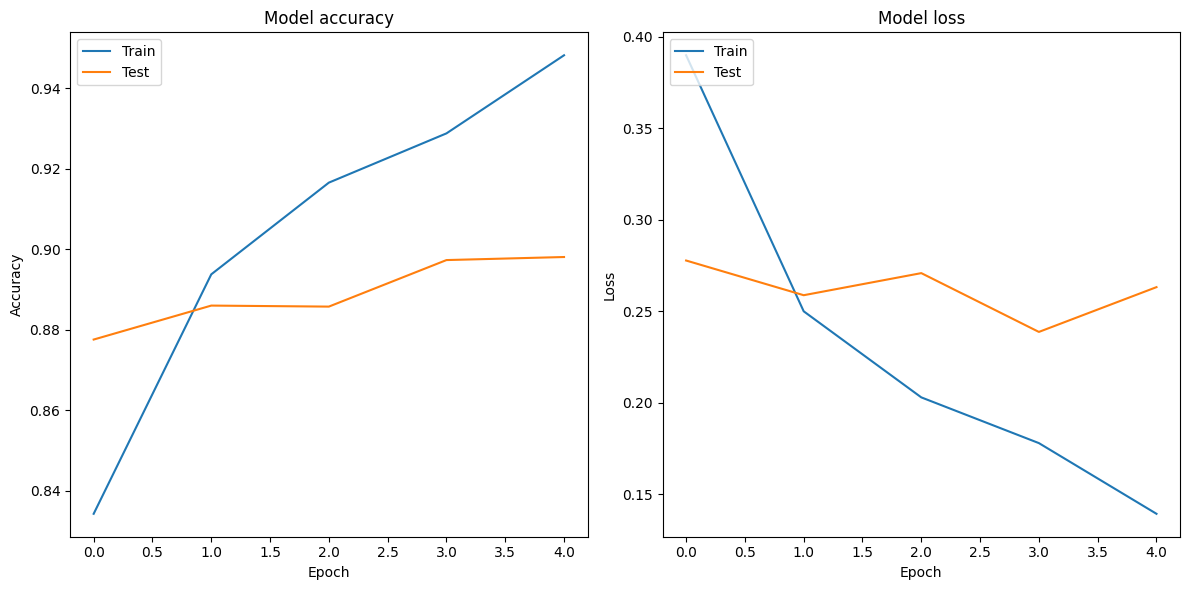

In [18]:
plot_history(history)
plt.show()

### MobileNet for UTKFace

In [ ]:
fit_mobilenet(X_train, y_train, X_test, y_test)

In [13]:
model_mobilenet.save('utkface/models/mobilenet_utkface.keras')

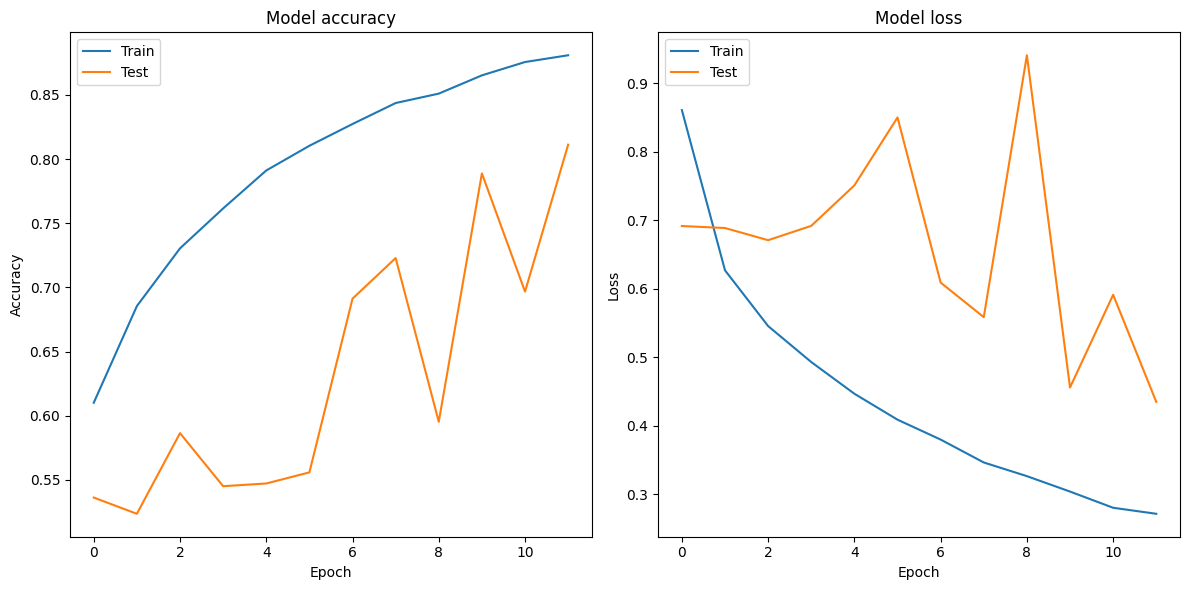

In [14]:
plot_history(history)

## Train Shadow Models

In [21]:
from utk_functions import get_distributed_utk_sets

all_dist = get_distributed_utk_sets()

now computing dist 0.1
now computing dist 0.2
now computing dist 0.3
now computing dist 0.4
now computing dist 0.5
now computing dist 0.6
now computing dist 0.7
now computing dist 0.8
now computing dist 0.9


In [22]:
histories = []
models = []

for dist in all_dist:
    print(f"Training model for dist={dist.distribution}")
    model = get_model()
    model.compile(
        optimizer=Adam(),#W(learning_rate=0.0001, weight_decay=0.0001),
        loss=CategoricalCrossentropy(),
        metrics=['accuracy']
    )
    hist = model.fit(
        X_train, y_train,
        batch_size=32,
        epochs=5,
        validation_data=(X_test, y_test)
    )
    histories.append(hist)
    models.append(model)

Training model for dist=0.1
Epoch 1/5
371/371 [==============================] - 30s 73ms/step - loss: 0.4157 - accuracy: 0.8264 - val_loss: 0.2812 - val_accuracy: 0.8757
Epoch 2/5
371/371 [==============================] - 24s 64ms/step - loss: 0.2610 - accuracy: 0.8864 - val_loss: 0.2578 - val_accuracy: 0.8866
Epoch 3/5
371/371 [==============================] - 24s 64ms/step - loss: 0.2123 - accuracy: 0.9122 - val_loss: 0.2592 - val_accuracy: 0.8921
Epoch 4/5
371/371 [==============================] - 24s 64ms/step - loss: 0.1806 - accuracy: 0.9280 - val_loss: 0.2893 - val_accuracy: 0.8865
Epoch 5/5
371/371 [==============================] - 24s 64ms/step - loss: 0.1568 - accuracy: 0.9388 - val_loss: 0.2690 - val_accuracy: 0.8927
Training model for dist=0.2
Epoch 1/5
371/371 [==============================] - 31s 73ms/step - loss: 0.4308 - accuracy: 0.8222 - val_loss: 0.2776 - val_accuracy: 0.8763
Epoch 2/5
371/371 [==============================] - 24s 65ms/step - loss: 0.2575 - ac

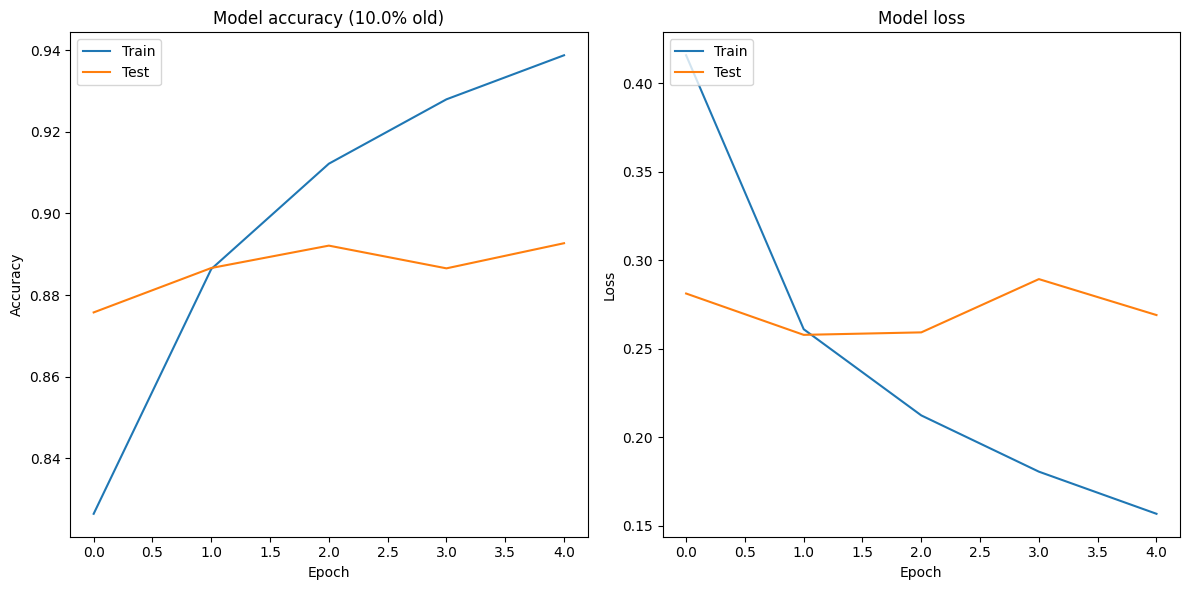

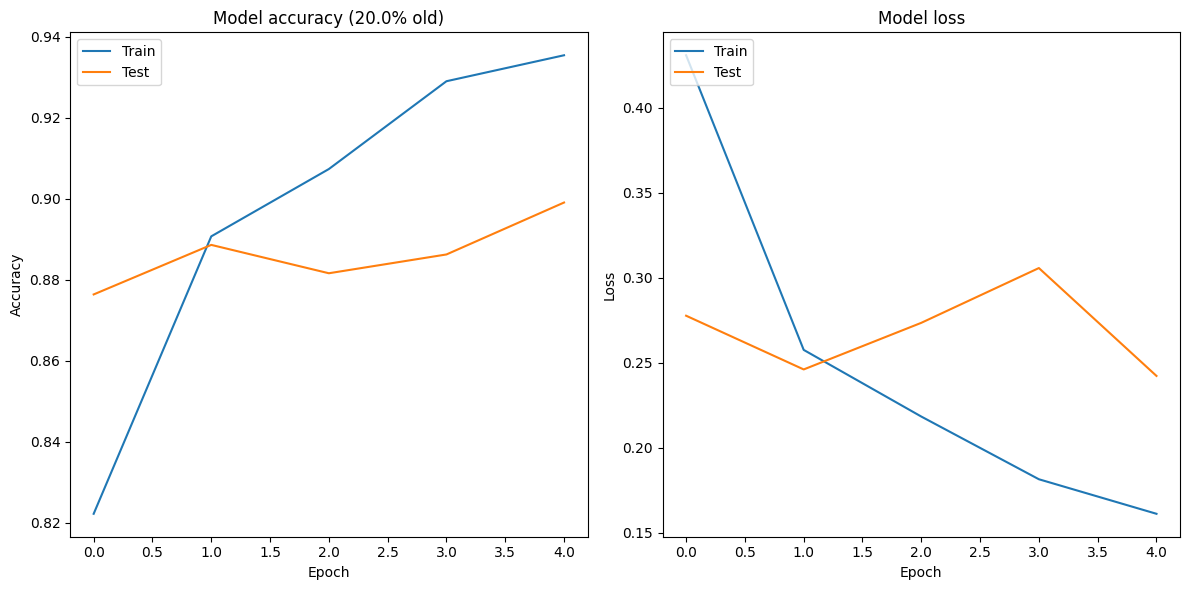

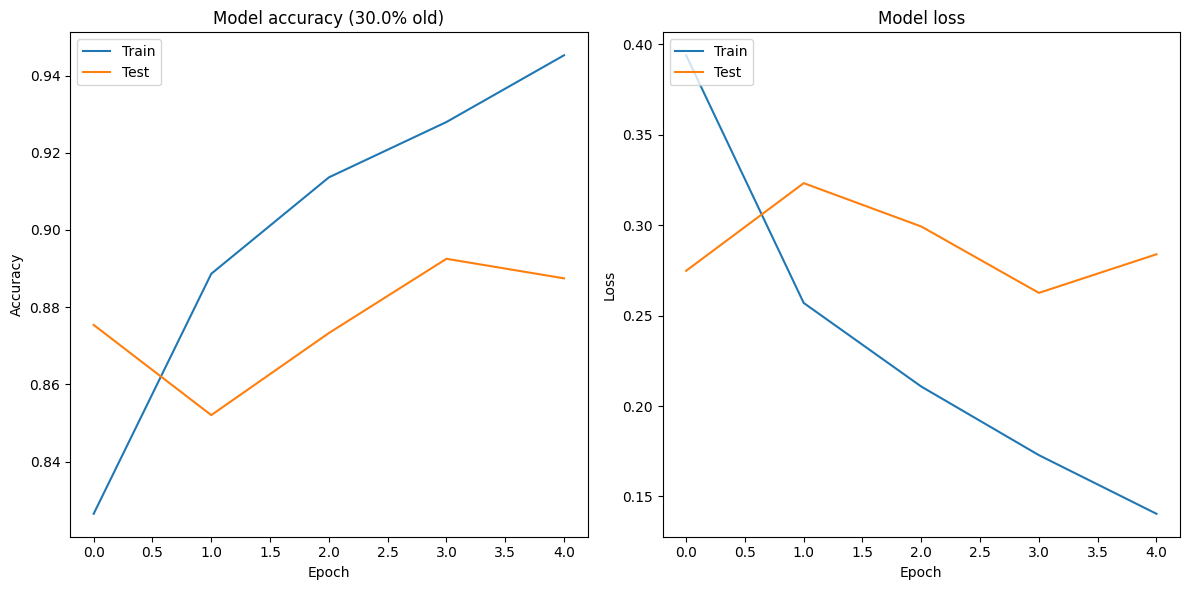

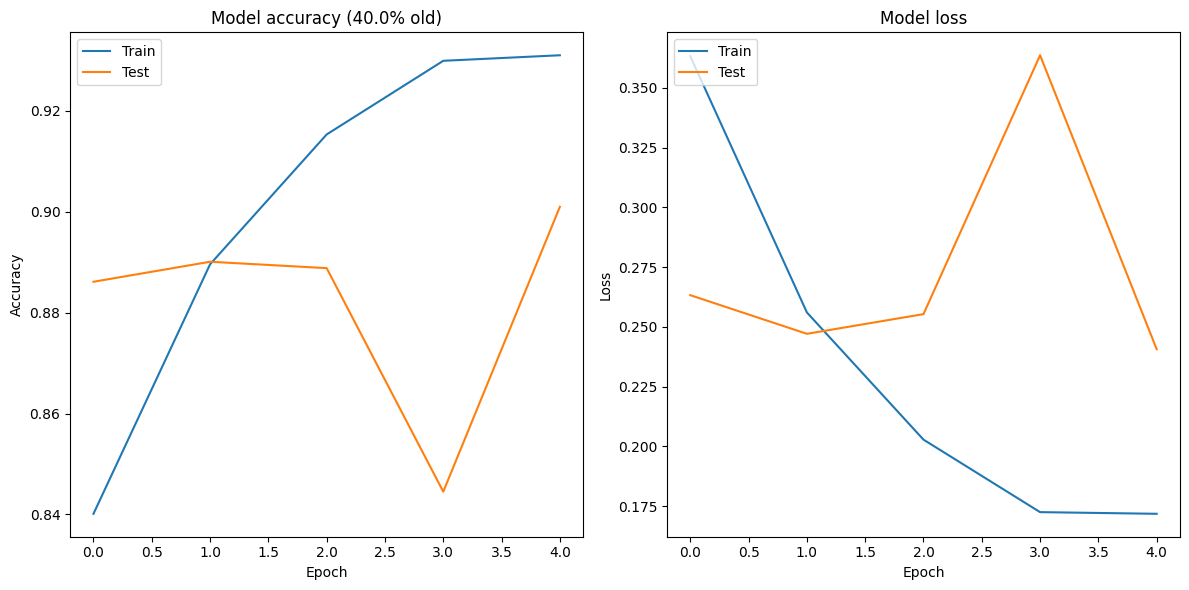

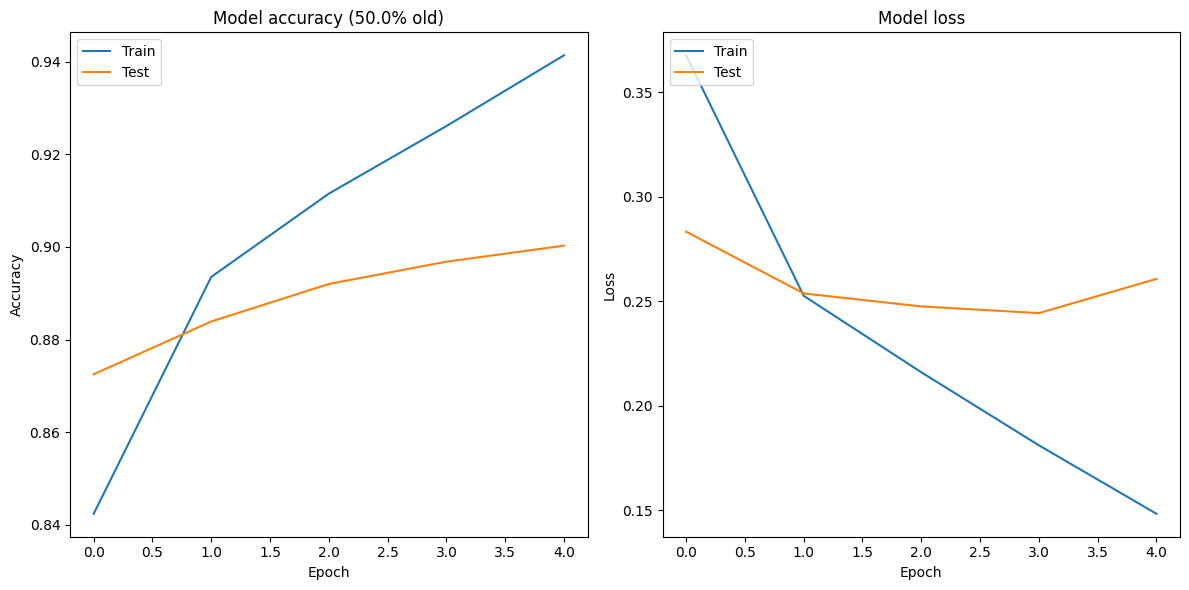

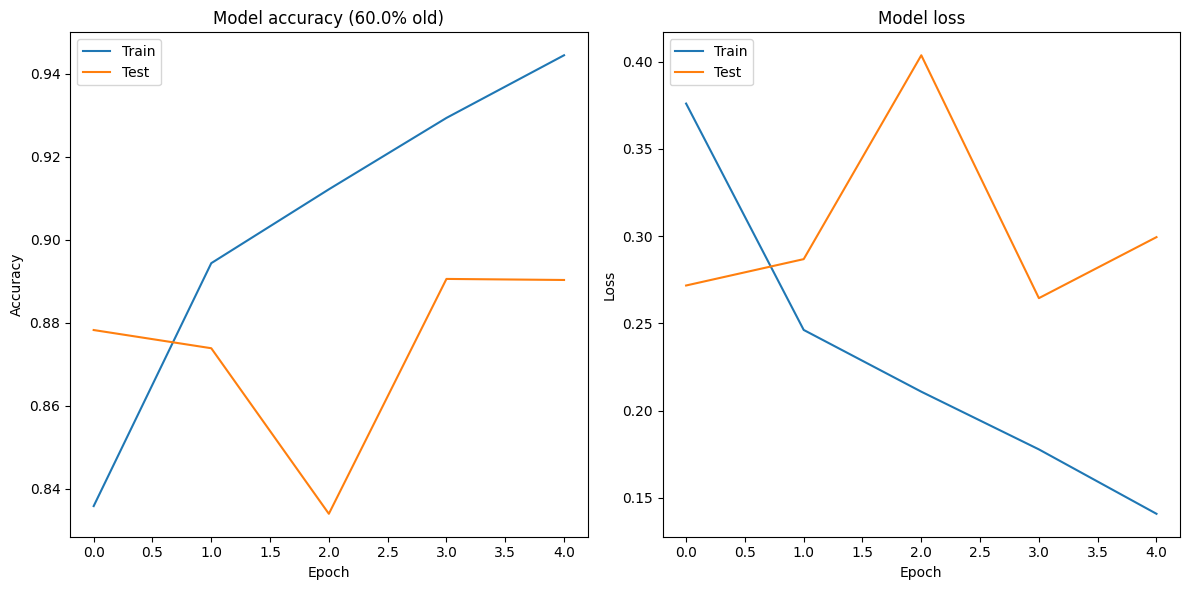

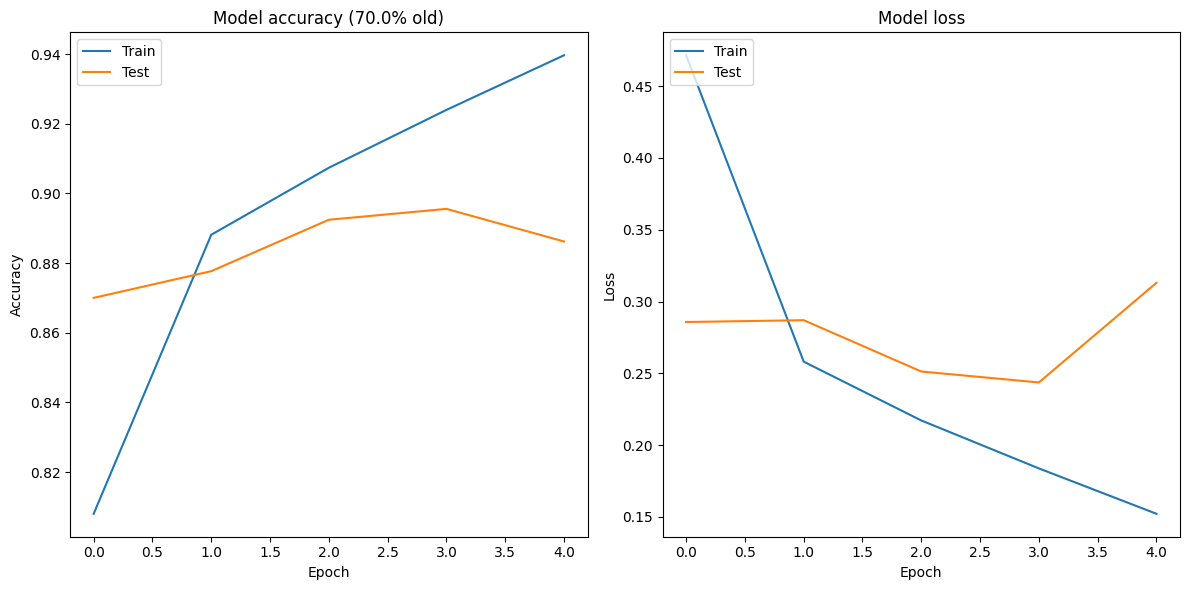

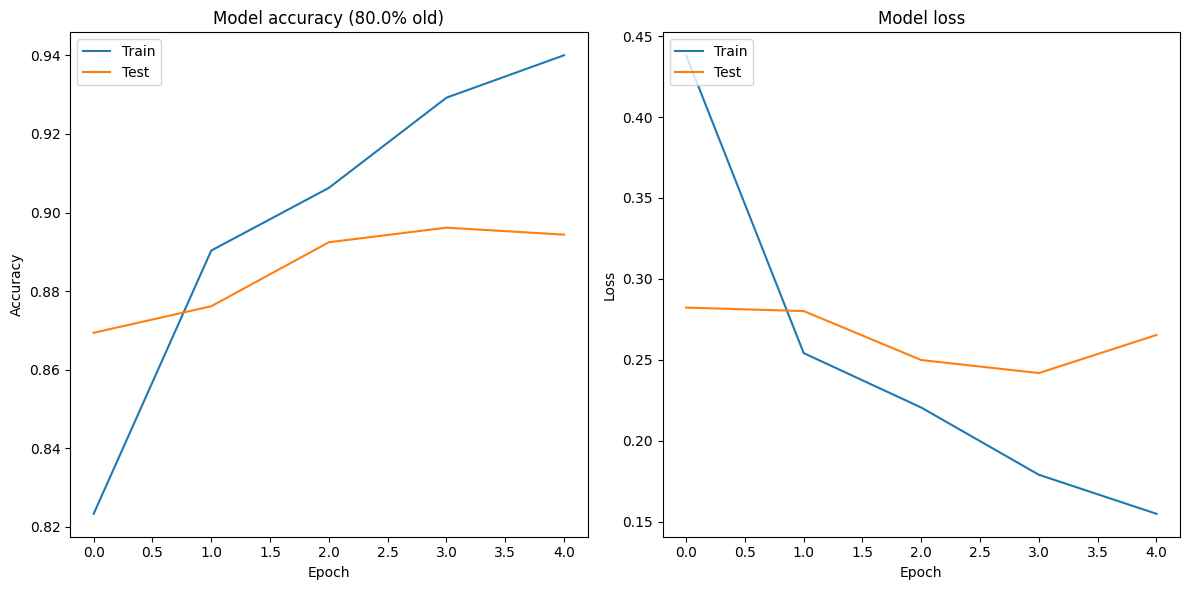

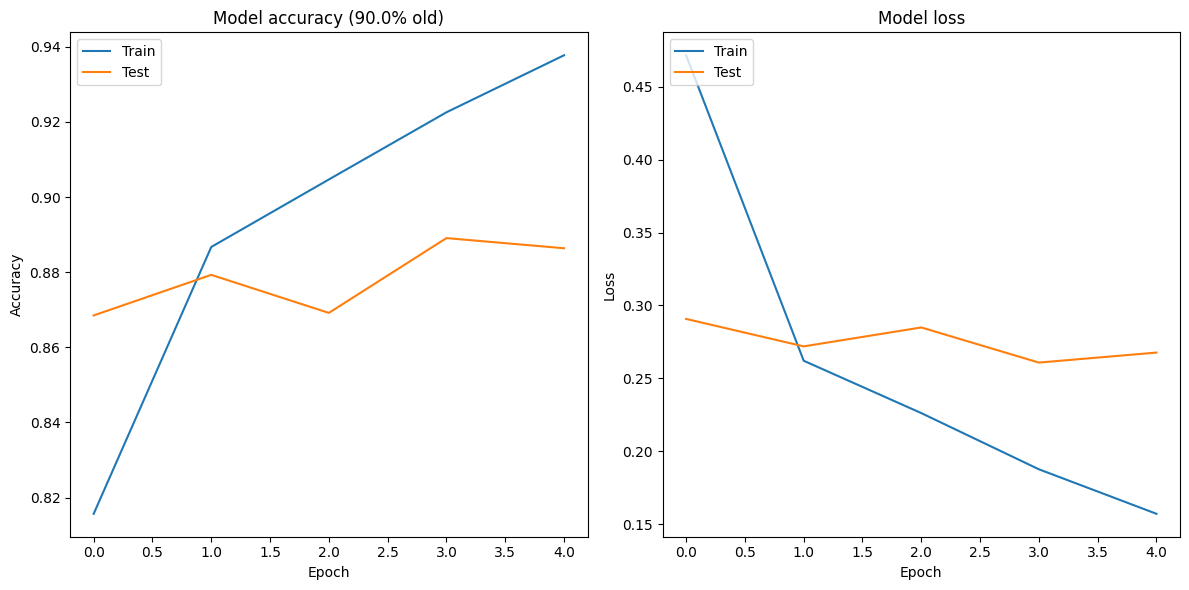

In [23]:
# new: lucasnet
for history, dist in zip(histories, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    plot_history(history, dist)

plt.show()

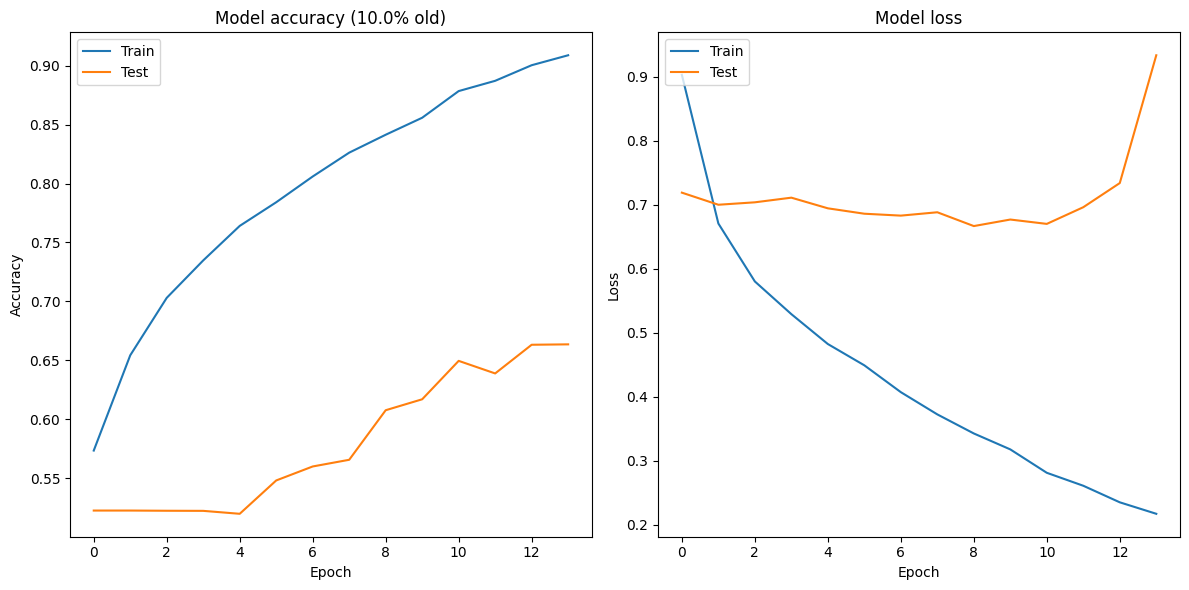

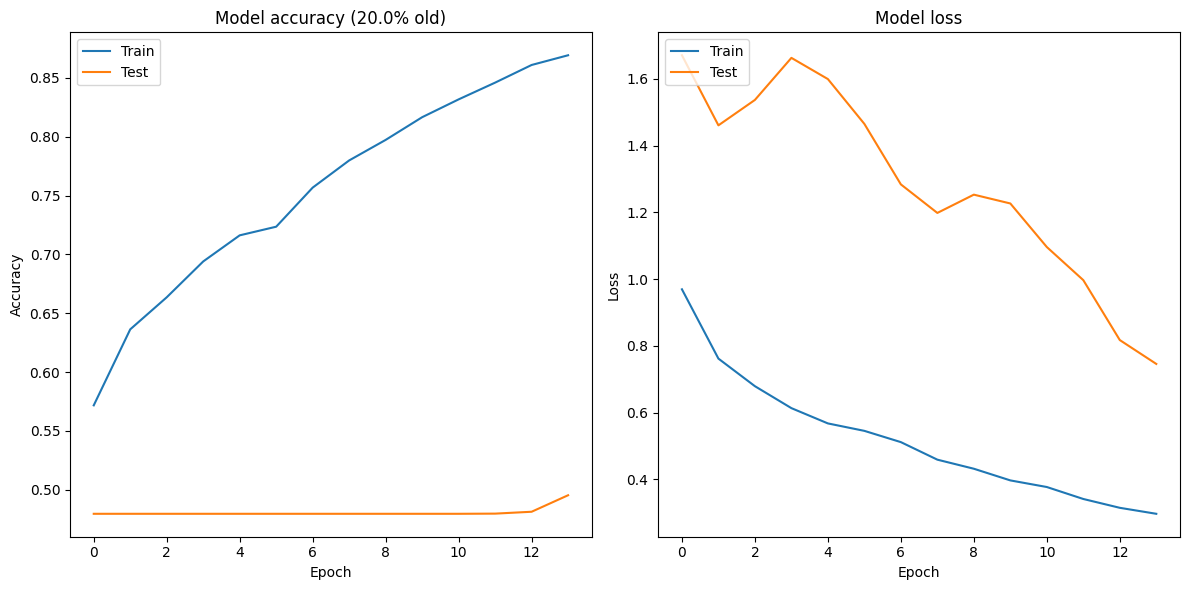

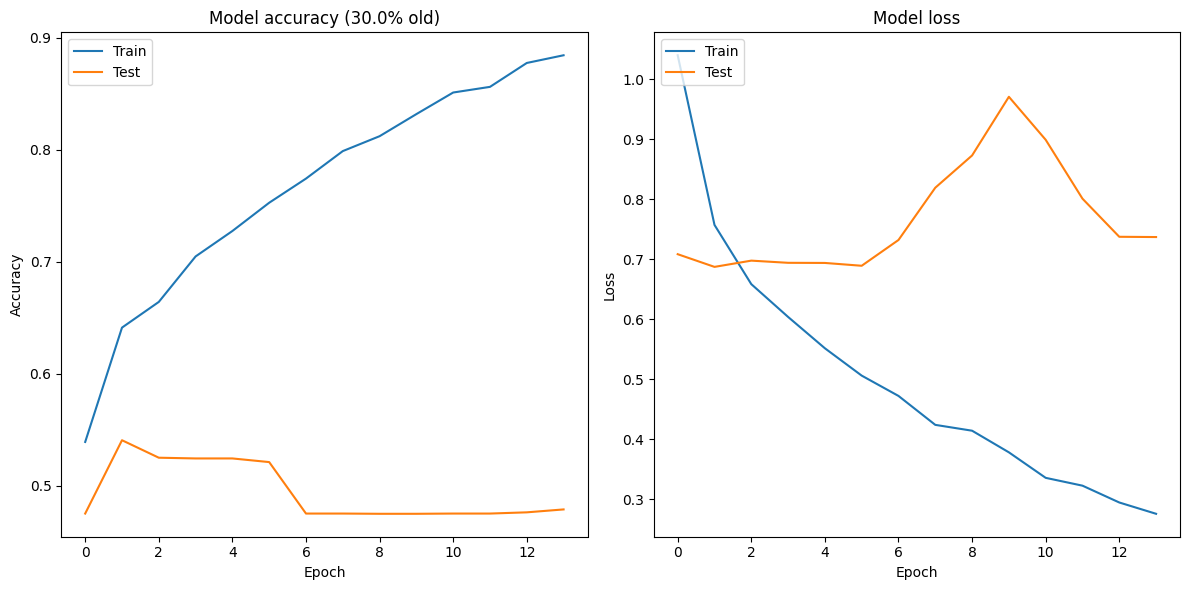

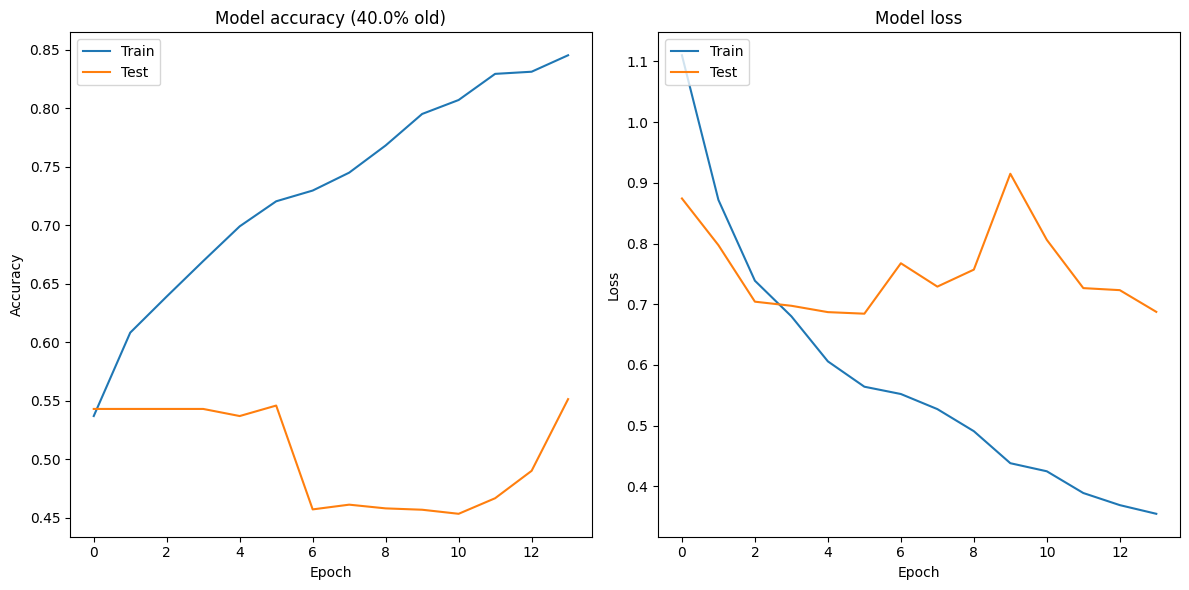

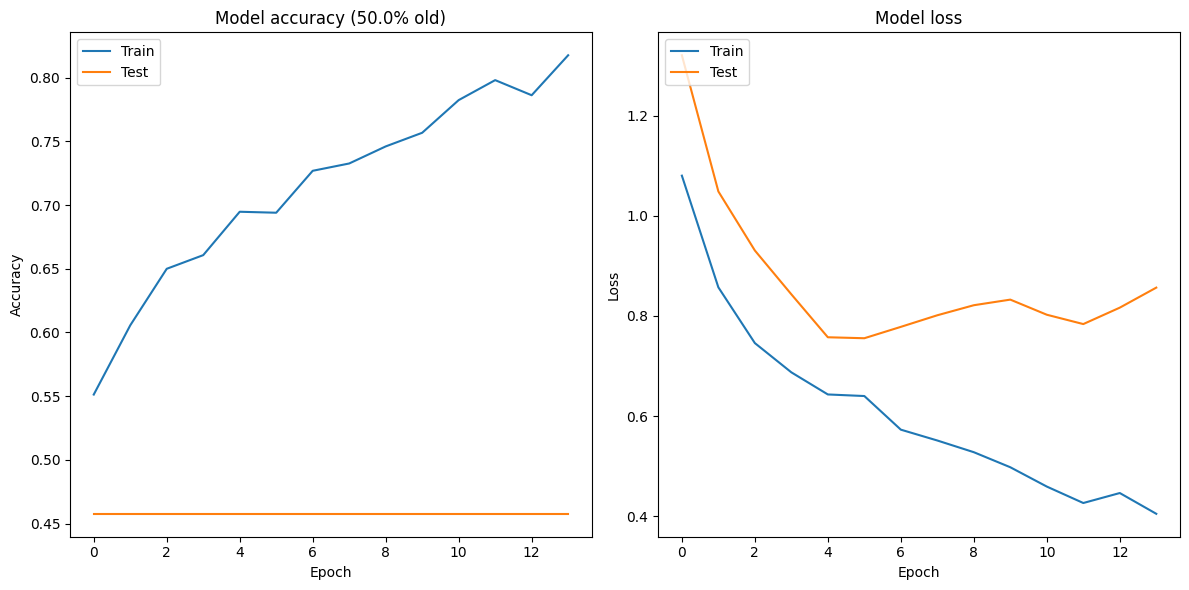

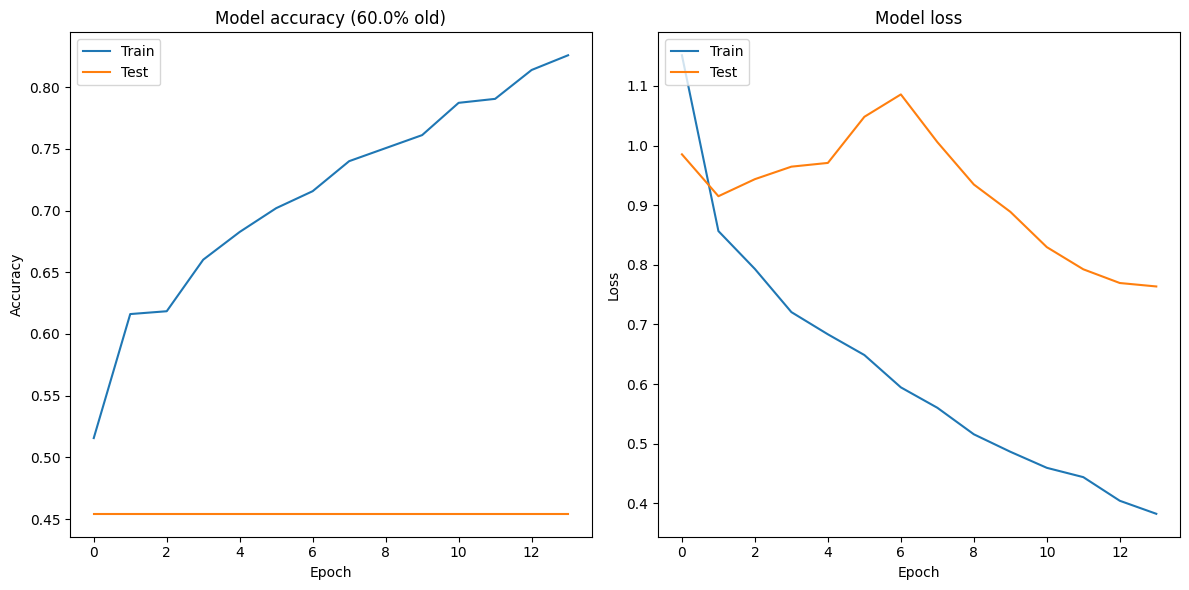

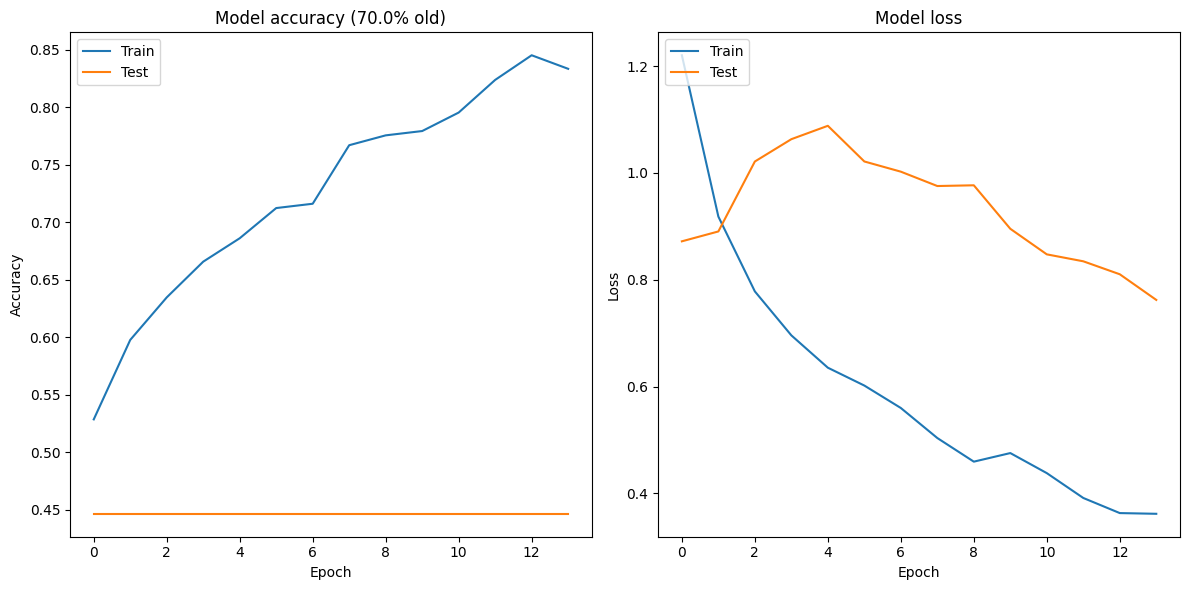

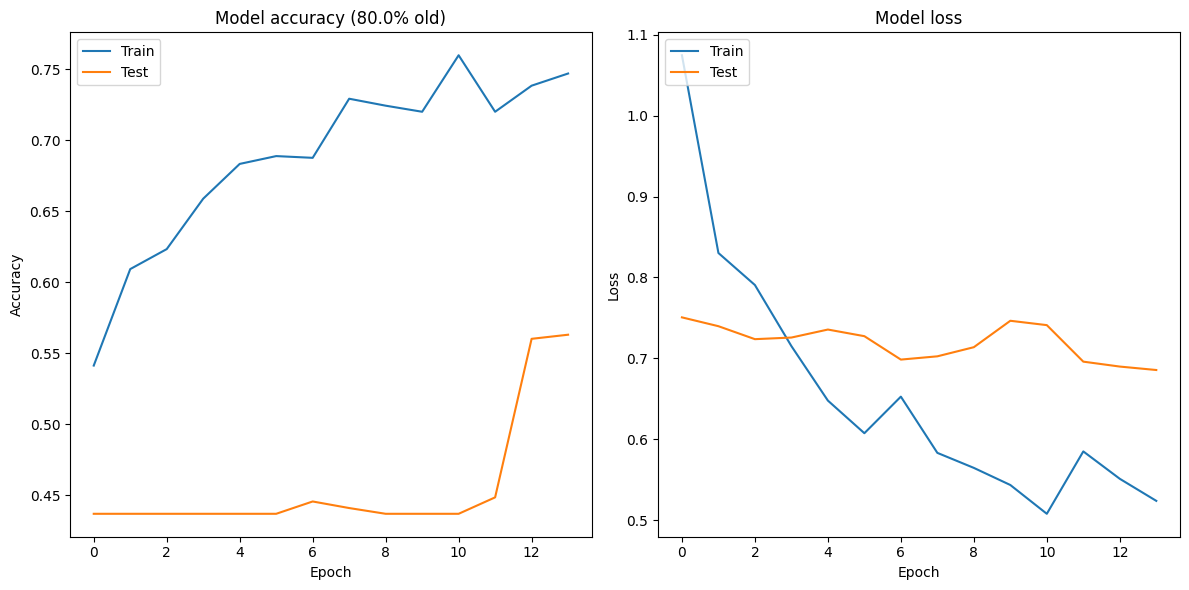

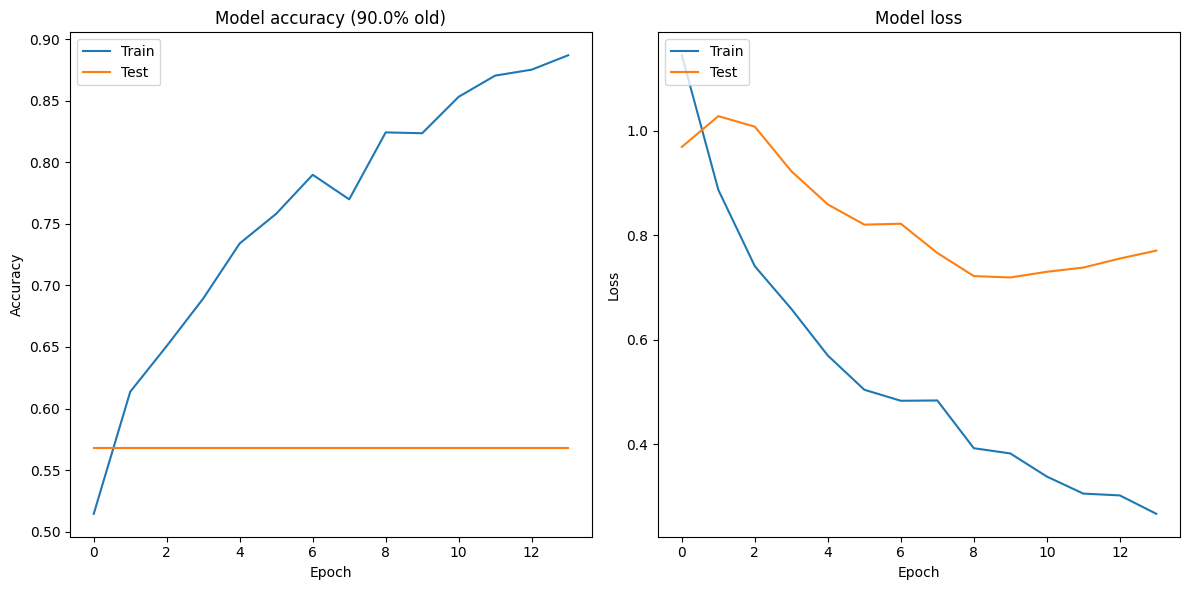

In [6]:
# old
for history, dist in zip(histories, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    plot_history(history, dist)

plt.show()

In [ ]:
# todo Bei kleinen Datensätzen (dist=0.9 -> ca. 700 Datenpunkte) ist die Accuracy sehr schlecht
 # >65: ca. 1100 Datenpunkte
 # evtl. Alter anders definieren? >60 Jahre?
# todo Schattenmodelle und Outputs generieren

## Labelled Faces in the Wild (LFW)
used to generate the adversary input

In [1]:
from utk_functions import get_lbfw_dataset, fit_mobilenet, data_train_test_utk

X = get_lbfw_dataset('utkface/data/lfw-deepfunneled')
X_train, X_test, y_train, y_test, _, _ = data_train_test_utk()

2024-02-05 14:48:01.675779: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-05 14:48:01.739848: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 14:48:01.739886: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 14:48:01.739919: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-05 14:48:01.751559: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-05 14:48:01.752696: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
model_mobilenet = fit_mobilenet(X_train, y_train, X_test, y_test)

Epoch 1/12
371/371 [==============================] - 47s 87ms/step - loss: 0.8549 - accuracy: 0.5995 - val_loss: 1.2700 - val_accuracy: 0.5208
Epoch 2/12
371/371 [==============================] - 29s 79ms/step - loss: 0.6710 - accuracy: 0.6666 - val_loss: 1.0511 - val_accuracy: 0.5208
Epoch 3/12
371/371 [==============================] - 30s 82ms/step - loss: 0.6070 - accuracy: 0.7001 - val_loss: 0.9045 - val_accuracy: 0.5208
Epoch 4/12
371/371 [==============================] - 31s 85ms/step - loss: 0.5554 - accuracy: 0.7268 - val_loss: 1.0943 - val_accuracy: 0.5208
Epoch 5/12
371/371 [==============================] - 32s 86ms/step - loss: 0.5164 - accuracy: 0.7450 - val_loss: 1.3124 - val_accuracy: 0.5208
Epoch 6/12
371/371 [==============================] - 32s 86ms/step - loss: 0.4972 - accuracy: 0.7618 - val_loss: 0.7868 - val_accuracy: 0.5208
Epoch 7/12
371/371 [==============================] - 33s 88ms/step - loss: 0.4733 - accuracy: 0.7704 - val_loss: 0.8910 - val_accuracy:

In [23]:
model_mobilenet.predict(X[0:10])[:, 0]

1/1 [==============================] - 0s 28ms/step


array([0.7559279 , 0.48840132, 0.7340921 , 0.8609187 , 0.7699364 ,
       0.68796015, 0.21983624, 0.8552622 , 0.889545  , 0.8320167 ],
      dtype=float32)

In [2]:
def format_model_output(output):
    return np.array(output[:, 0]).astype(np.float16)

In [3]:
# get output for first 200 shadow models of dist 0.1
from utk_functions import get_lbfw_dataset
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd

test_run = False
n_shadow_models = 200
model_input = get_lbfw_dataset()
dist = 0.1

save_model_path = f"utkface/models/shadow_models/{dist}/{'test' if test_run else 'train'}/"

outputs = []
for i in range(n_shadow_models):
    if i % 10 == 0:
        print(f"Processing model {i}")
    m = load_model(f"{save_model_path}{i}.keras")
    outputs.append(format_model_output(m.predict(model_input, verbose=0)))

Processing model 0


TypeError: <class 'keras.src.models.sequential.Sequential'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras', 'class_name': 'Sequential', 'config': {'name': 'sequential', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 64, 64, 3], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'random_flip_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'RandomFlip', 'config': {'name': 'random_flip', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 64, 64, 3], 'mode': 'horizontal', 'seed': 42}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 3]}}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 3]}}, {'module': 'keras.layers', 'class_name': 'GroupNormalization', 'config': {'name': 'group_normalization', 'trainable': True, 'dtype': 'float32', 'groups': 32, 'axis': -1, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 32]}}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 32]}}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 32, 32, 32]}}, {'module': 'keras.layers', 'class_name': 'GroupNormalization', 'config': {'name': 'group_normalization_1', 'trainable': True, 'dtype': 'float32', 'groups': 32, 'axis': -1, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 32, 32, 32]}}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_1', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 32, 32, 32]}}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_2', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 16, 16, 32]}}, {'module': 'keras.layers', 'class_name': 'GroupNormalization', 'config': {'name': 'group_normalization_2', 'trainable': True, 'dtype': 'float32', 'groups': 32, 'axis': -1, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 16, 16, 64]}}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_2', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 16, 16, 64]}}, {'module': 'keras.layers', 'class_name': 'Flatten', 'config': {'name': 'flatten', 'trainable': True, 'dtype': 'float32', 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 8, 8, 64]}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 4096]}}, {'module': 'keras.layers', 'class_name': 'GroupNormalization', 'config': {'name': 'group_normalization_3', 'trainable': True, 'dtype': 'float32', 'groups': 32, 'axis': -1, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 512]}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 2, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 512]}}]}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 3]}, 'compile_config': {'optimizer': {'module': 'keras.optimizers.legacy', 'class_name': 'Adam', 'config': {'name': 'Adam', 'learning_rate': 0.0010000000474974513, 'decay': 0.0, 'beta_1': 0.8999999761581421, 'beta_2': 0.9990000128746033, 'epsilon': 1e-07, 'amsgrad': False}, 'registered_name': None}, 'loss': {'module': 'keras.losses', 'class_name': 'CategoricalCrossentropy', 'config': {'reduction': 'auto', 'name': 'categorical_crossentropy', 'from_logits': False, 'label_smoothing': 0.0, 'axis': -1, 'fn': 'categorical_crossentropy'}, 'registered_name': None}, 'metrics': ['accuracy'], 'loss_weights': None, 'weighted_metrics': None, 'run_eagerly': None, 'steps_per_execution': None, 'jit_compile': None}}.

Exception encountered: <class 'keras.src.layers.preprocessing.random_flip.RandomFlip'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.layers', 'class_name': 'RandomFlip', 'config': {'name': 'random_flip', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 64, 64, 3], 'mode': 'horizontal', 'seed': 42}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 3]}}.

Exception encountered: Error when deserializing class 'RandomFlip' using config={'name': 'random_flip', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 64, 64, 3], 'mode': 'horizontal', 'seed': 42}.

Exception encountered: Unrecognized keyword arguments passed to RandomFlip: {'batch_input_shape': [None, 64, 64, 3]}

In [ ]:
adv_df = pd.DataFrame(outputs)
adv_df["y"] = np.repeat(dist, n_shadow_models)
save_data_path = f"utkface/data/shadow_model_outputs/{dist}/"


In [ ]:
adv_df.to_csv(f"{save_data_path}{'test' if test_run else 'train'}.csv", index=False)

In [1]:
!mkdir /dev/shm/utkface

## train adversary

In [5]:
import pandas as pd

adv_train = pd.concat([pd.read_csv(f"utkface/data/shadow_model_outputs/{dist}/train.csv") for dist in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]])
adv_test = pd.concat([pd.read_csv(f"utkface/data/shadow_model_outputs/{dist}/test.csv") for dist in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]])

In [6]:
adv_y = adv_train["y"]
adv_X = adv_train.drop(columns=["y"])
adv_y_test = adv_test["y"]
adv_X_test = adv_test.drop(columns=["y"])

In [32]:
import keras

manual_adversary = keras.Sequential()
manual_adversary.add(keras.Input(shape=(adv_X.shape[1],)))
manual_adversary.add(keras.layers.Dense(64, activation='relu'))
manual_adversary.add(keras.layers.Dense(18, activation='relu'))
manual_adversary.add(keras.layers.Dense(1))
manual_adversary.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.R2Score()])

In [33]:
checkpoint_filepath = 'utkface/models/manual_tuning_checkpoints/keras.weights.h5'
history = manual_adversary.fit(
    adv_X,
    adv_y,
    epochs=200,
    validation_data=(adv_X_test, adv_y_test),
    callbacks=[
        keras.callbacks.EarlyStopping('val_r2_score', mode='max', patience=20, verbose=1),
        keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_filepath,
            save_weights_only=True,
            monitor='val_r2_score',
            mode='max',
            save_best_only=True)
    ])

Epoch 1/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 11.2886 - r2_score: -178.4298 - val_loss: 0.0259 - val_r2_score: 0.6137
Epoch 2/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - r2_score: 0.8846 - val_loss: 0.0220 - val_r2_score: 0.6764
Epoch 3/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - r2_score: 0.9215 - val_loss: 0.0242 - val_r2_score: 0.6487
Epoch 4/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - r2_score: 0.8859 - val_loss: 0.0376 - val_r2_score: 0.4536
Epoch 5/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - r2_score: 0.8400 - val_loss: 0.0408 - val_r2_score: 0.4085
Epoch 6/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - r2_score: 0.8980 - val_loss: 0.0398 - val_r2_score: 0.4212
Epoch 7/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - r2_score: 0.8933 - val_loss: 0.0195 - val_r2_score: 0.7165
Epoch 8/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - r2_score: 0.8972 - val_loss: 0.0356 - 

In [34]:
def plot_history(history, dist=None):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['r2_score'][1:])
    plt.plot(history.history['val_r2_score'][1:])
    plt.title(f'Model r2 score ({"" if dist == None else dist*100}% old)')
    plt.ylabel('R2 Score')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.tight_layout()

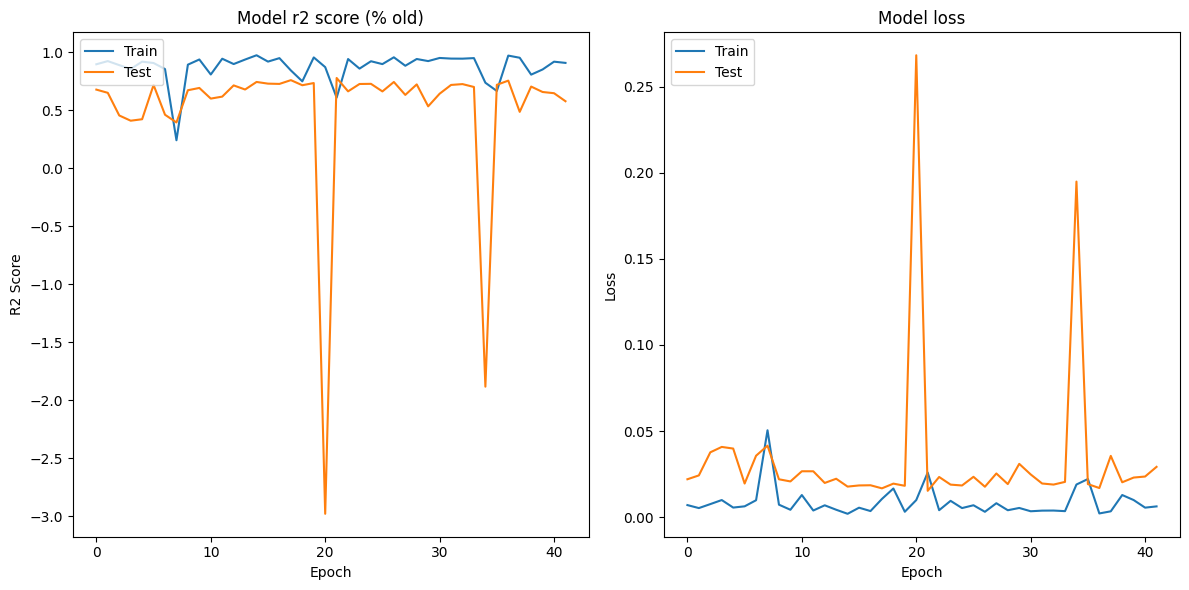

In [35]:
plot_history(history)

In [29]:
history.history

{'loss': [7.122625350952148,
  0.043965503573417664,
  0.02377895638346672,
  0.020748239010572433,
  0.020488819107413292,
  0.020177064463496208,
  0.014703040942549706,
  0.017587503418326378,
  0.01376168429851532,
  0.011217199265956879,
  0.010988658294081688,
  0.012846513651311398,
  0.011872316710650921,
  0.012115406803786755,
  0.011326338164508343,
  0.008737505413591862,
  0.011892208829522133,
  0.013061365112662315,
  0.008516361936926842,
  0.009314514696598053,
  0.008125951513648033,
  0.007935197092592716,
  0.01640094630420208,
  0.006633289624005556,
  0.005261684767901897,
  0.005418619140982628,
  0.014741668477654457,
  0.005369008518755436,
  0.006816360168159008,
  0.052915602922439575,
  0.010349982418119907,
  0.030228974297642708,
  0.05560674890875816,
  0.15588028728961945,
  0.02669432759284973],
 'r2_score': [-107.21005249023438,
  0.3375577926635742,
  0.6460544466972351,
  0.6913682222366333,
  0.6902609467506409,
  0.6961854100227356,
  0.78174847364